In [2]:
#Imported important modules like pandas,numpy,matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('C:/Users/G V Swetha/Desktop/heart.csv')

In [4]:
df


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,145,233,1,0,150,0,2.3,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,1
2,41,0,130,204,0,0,172,0,1.4,2,0,1
3,56,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,0
300,68,1,144,193,1,1,141,0,3.4,1,2,0
301,57,1,130,131,0,1,115,1,1.2,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  target    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [6]:
#Doing EDA

import pandas_profiling


eda_report = pandas_profiling.ProfileReport(df)
eda_report
eda_report.to_file('heart_eda.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Checking for missing values 
df.isna().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

# EDA Analysis

1) There are 5 numeric and 7 Categorical Variables
2) There are no missing values
3) All categorical variables are already dummy coded


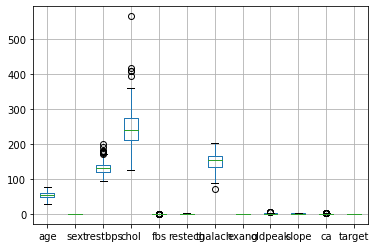

In [8]:
# Checking for outlier using boxplot
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001769BB57E80>,
      dtype=object)

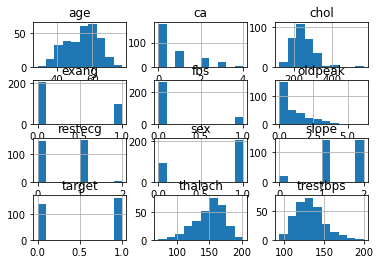

In [9]:
df.hist()

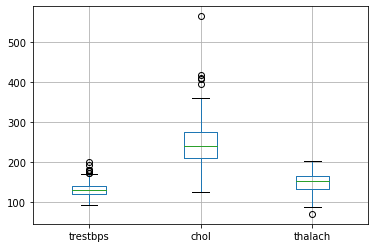

In [10]:
df.boxplot(column=['trestbps','chol','thalach'])

In [11]:
#Outlier treatment using flooring and capping
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#After doing boxplot noticed that trestbps,chol,thalach have outlier and it needs to be treated
#Used flooring and capping method for outlier treatment 

df.trestbps.quantile([0,0.01,0.02,0.05,0.5,.75,.85,0.95,0.99])

df.chol.quantile([0,0.01,0.02,0.05,0.5,.75,.85,0.95,0.99])
df.thalach.quantile(([0,0.01,0.02,0.05,0.5,.75,.85,0.95,0.99]))


df.trestbps = np.clip(df.trestbps,df.trestbps.quantile(0.02),df.trestbps.quantile(0.95))
df.chol = np.clip(df.chol,df.chol.quantile(0.02),df.chol.quantile(0.95))
df.thalach = np.clip(df.thalach,df.thalach.quantile(0.02),df.thalach.quantile(0.95))

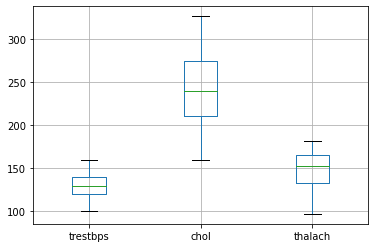

In [12]:
#Boxplot post outier treatment 

df.boxplot(column=['trestbps','chol','thalach'])

In [13]:
#Preparing train and test data
x=df.drop(['target'],axis=1)
y=df['target']
x.head()
y.head()


from sklearn.model_selection import train_test_split
#Create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,145.0,233.0,1,0,150.0,0,2.3,0,0
1,37,1,130.0,250.0,0,1,181.9,0,3.5,0,0
2,41,0,130.0,204.0,0,0,172.0,0,1.4,2,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0
4,57,0,120.0,326.9,0,1,163.0,1,0.6,2,0


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

(227, 11)
(76, 11)
(227,)
(76,)


In [14]:
#Model Evaluation : First Considered Decision Tree Classifier 

clf=tree.DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=3)
clf.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

<Figure size 2880x2160 with 0 Axes>

[Text(1116.0, 1426.95, 'ca <= 0.5\nentropy = 0.996\nsamples = 227\nvalue = [105, 122]'),
 Text(558.0, 1019.25, 'exang <= 0.5\nentropy = 0.831\nsamples = 133\nvalue = [35, 98]'),
 Text(279.0, 611.55, 'sex <= 0.5\nentropy = 0.595\nsamples = 97\nvalue = [14, 83]'),
 Text(139.5, 203.8499999999999, 'entropy = 0.162\nsamples = 42\nvalue = [1, 41]'),
 Text(418.5, 203.8499999999999, 'entropy = 0.789\nsamples = 55\nvalue = [13, 42]'),
 Text(837.0, 611.55, 'oldpeak <= 0.7\nentropy = 0.98\nsamples = 36\nvalue = [21, 15]'),
 Text(697.5, 203.8499999999999, 'entropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(976.5, 203.8499999999999, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(1674.0, 1019.25, 'slope <= 1.5\nentropy = 0.82\nsamples = 94\nvalue = [70, 24]'),
 Text(1395.0, 611.55, 'oldpeak <= 0.55\nentropy = 0.434\nsamples = 56\nvalue = [51, 5]'),
 Text(1255.5, 203.8499999999999, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(1534.5, 203.8499999999999, 'entropy = 0.146\nsamples 

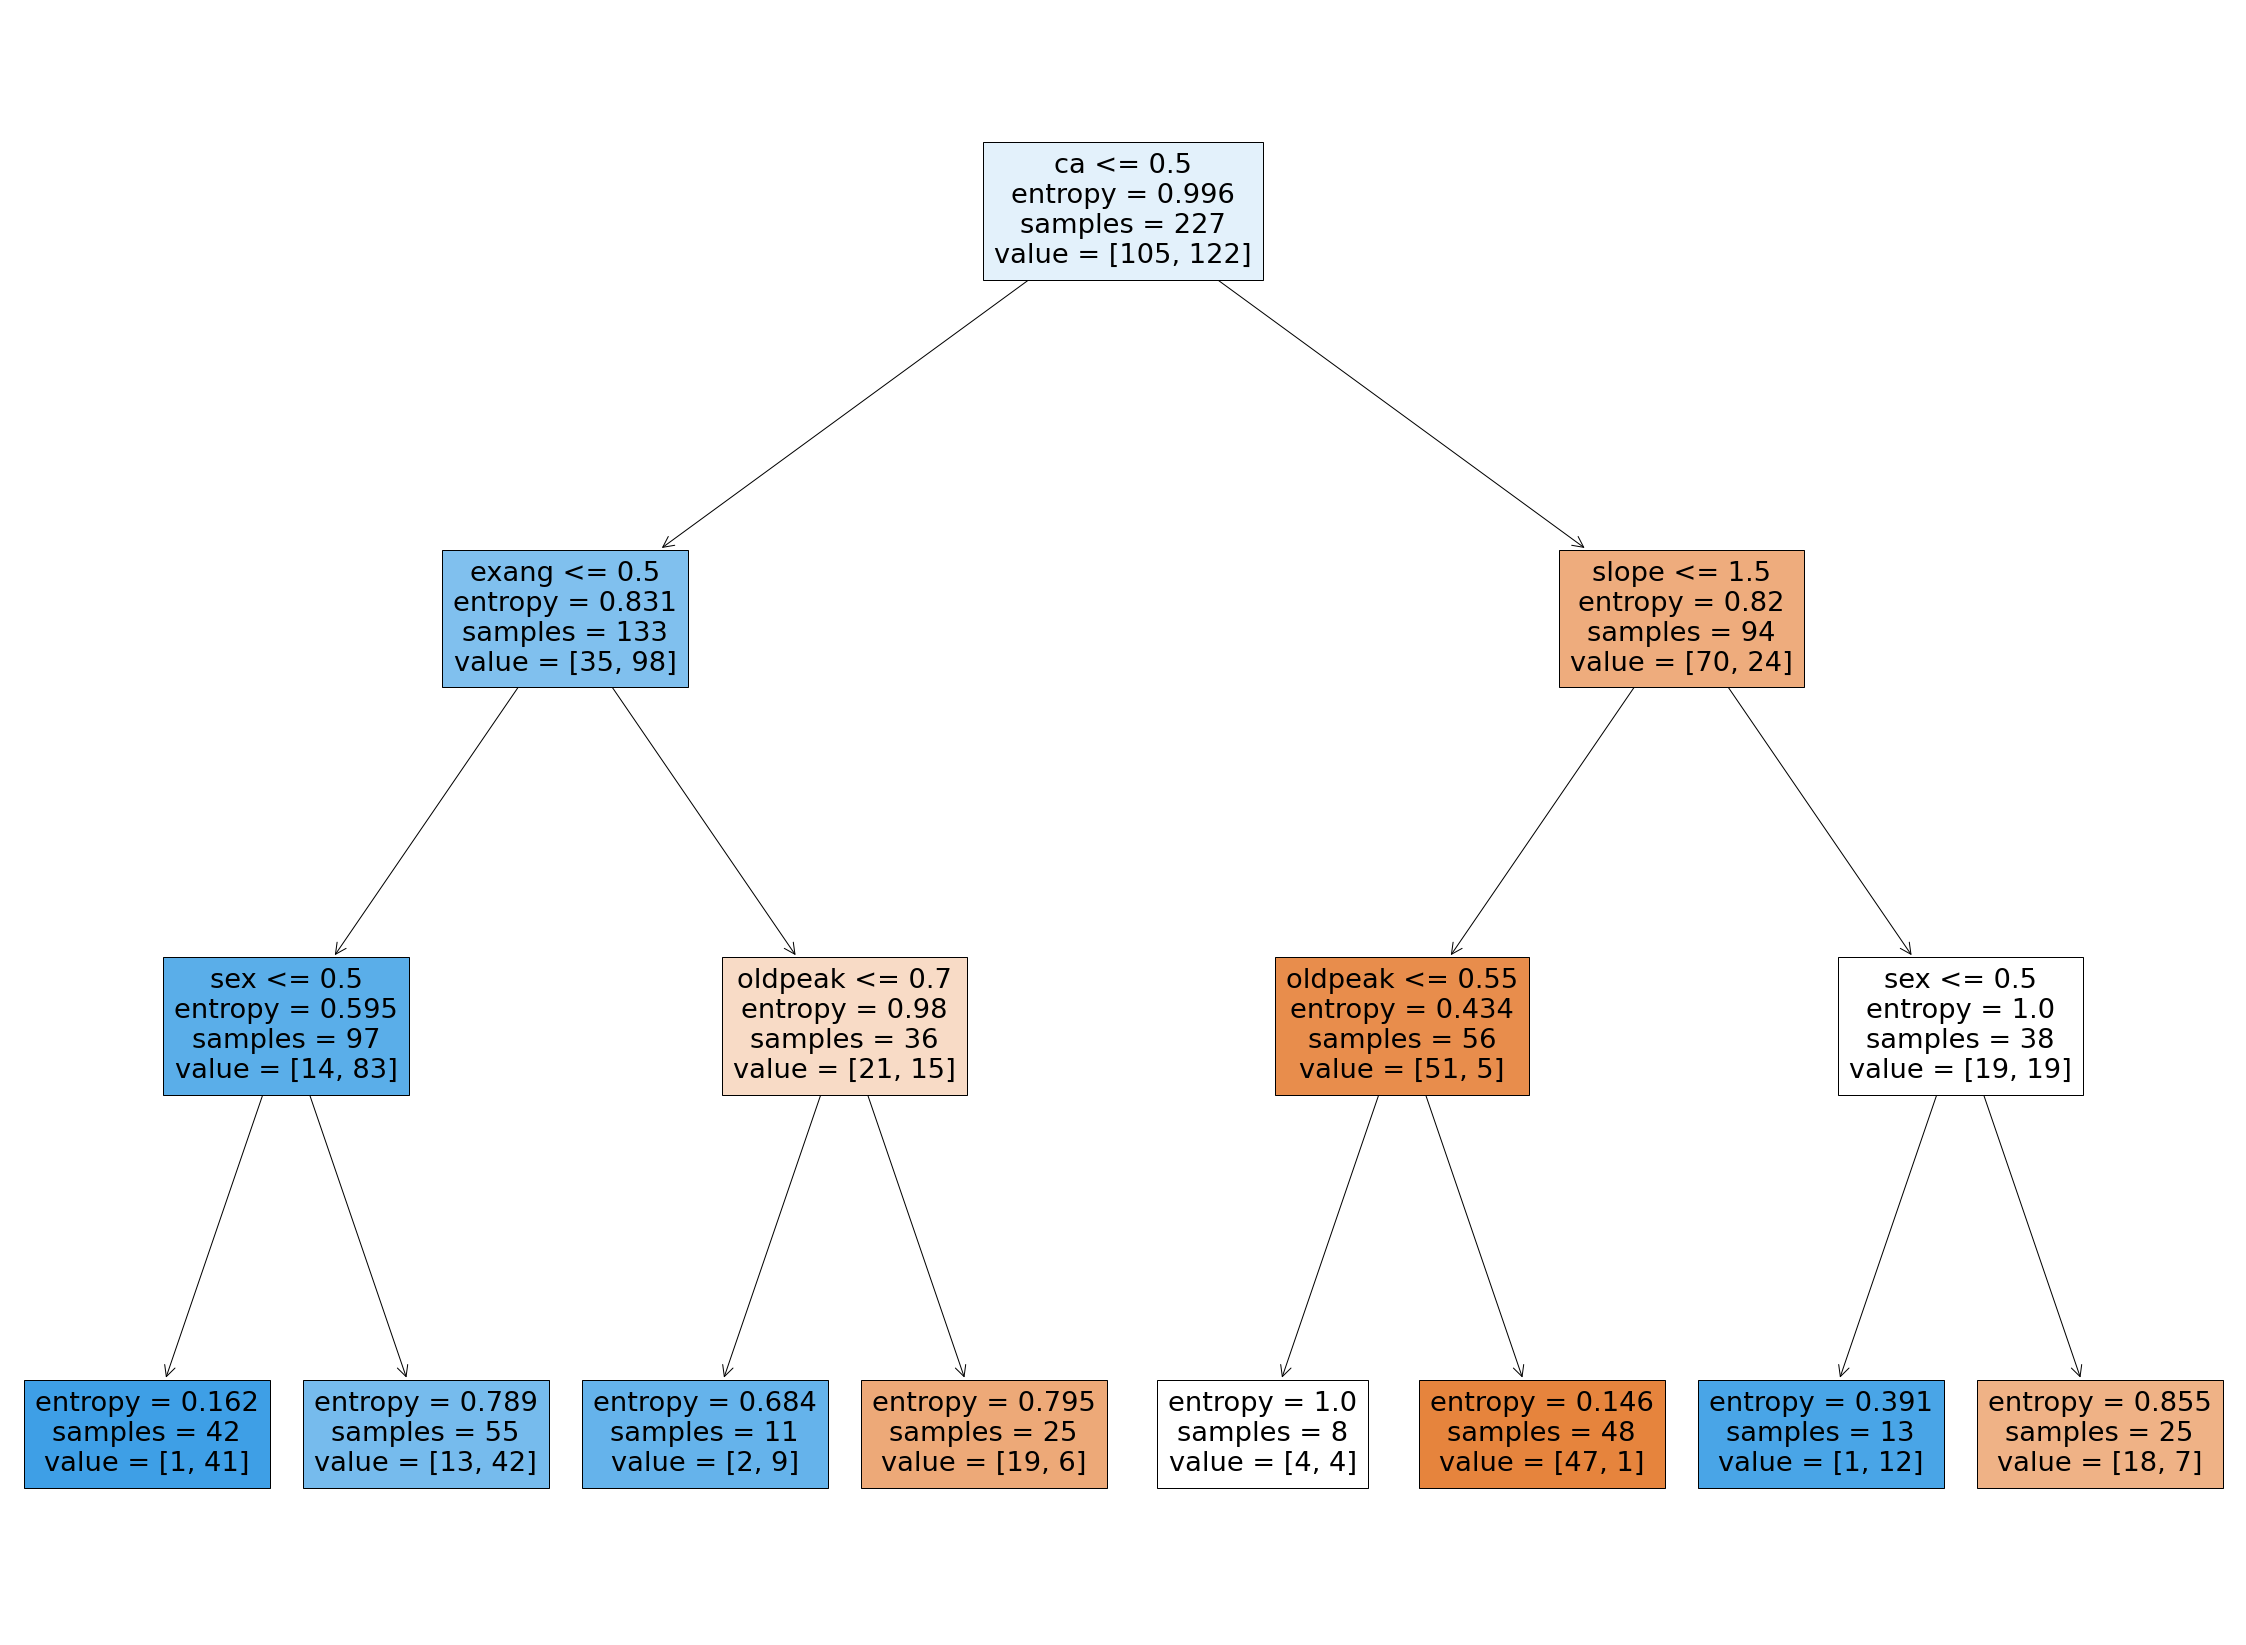

In [15]:


plt.figure(figsize=(40,30))
tree.plot_tree(clf,filled=True,feature_names=x.columns,);
plt.show()

In [16]:
dtree_predicted=clf.predict(test_x)

Accuracy Score
0.7763157894736842
Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.82      0.77      0.80        43

    accuracy                           0.78        76
   macro avg       0.77      0.78      0.77        76
weighted avg       0.78      0.78      0.78        76

AUC
Confusion Matrix


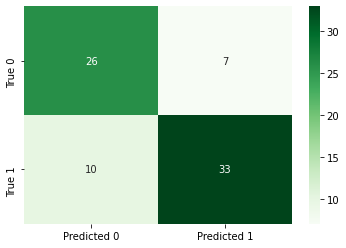

In [17]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,confusion_matrix
# model evaluation
print("Accuracy Score")
print(metrics.accuracy_score(test_y,dtree_predicted))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,dtree_predicted))
print("AUC")
auc=metrics.roc_auc_score(test_y,dtree_predicted)
auc

#Confusion matrix for Decision Trees
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,dtree_predicted)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();


In [69]:
#Now considering Logistic Regression 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.coef__
lr.fit(train_x,train_y)
classes=lr.predict(test_x)

# Model evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,confusion_matrix
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc




AttributeError: 'LogisticRegression' object has no attribute 'coef__'

Confusion Matrix


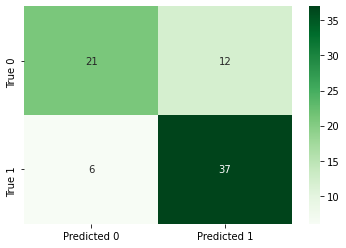

In [19]:
#Confusion matrix for Logistic regression
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

Model Analysis :

1) I have considered Recall as the evaluating parameter . I also considered target 0 i.e anamoly detection as criterion . Based on among assumptions i feel Decision Tree does better job than Logistic regression in identifying heart patients


In [20]:
#Hyper Parameter Optimisation on tree

my_max_depth =[5,10,15,20,50]
my_criterion = ['gini','entropy']
my_min_samples_leaf = [2,5,10,15,20,25]
my_min_samples_split = [2,5,10,15,50,100]

from sklearn.model_selection import GridSearchCV



In [21]:
grid = GridSearchCV(estimator=clf,cv=4,scoring='recall',
                    param_grid=dict(max_depth= my_max_depth,criterion=my_criterion,min_samples_leaf=my_min_samples_leaf,min_samples_split=my_min_samples_split) )

In [22]:
grid.fit(train_x,train_y)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

In [23]:
predicted= grid.predict(test_x)
from sklearn import metrics
print(metrics.classification_report(test_y,predicted))

#There wasnt any significant imporvement in recall for identifying 0 using Hyperthreshold parameter 


              precision    recall  f1-score   support

           0       0.68      0.79      0.73        33
           1       0.82      0.72      0.77        43

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76



In [24]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [25]:
#Threshold Optimisation 

predicted_prob=grid.predict_proba(test_x)
predicted_prob
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_prob_df
predicted_classes_df = pd.DataFrame(predicted)
predicted
predicted_classes_df
y_actual_df = pd.DataFrame(test_y.values)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df,y_actual_df],axis=1)
predicted_df.columns=['Prob_0','Prob_1','Predicted_Class','Actual_Class']
predicted_df.sample(20)

array([[0.53846154, 0.46153846],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.53846154, 0.46153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.53846154, 0.46153846],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.35      , 0.65      ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.

,0,1
0,0.538462,0.461538
1,0.350000,0.650000
2,0.350000,0.650000
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
71,0.000000,1.000000
72,0.000000,1.000000
73,1.000000,0.000000
74,1.000000,0.000000


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

,0
0,0
1,1
2,1
3,0
4,0
...,...
71,1
72,1
73,0
74,0


,Prob_0,Prob_1,Predicted_Class,Actual_Class
5,0.000000,1.000000,1,0
40,0.350000,0.650000,1,1
61,0.000000,1.000000,1,1
29,0.500000,0.500000,0,1
34,0.125000,0.875000,1,1
28,0.000000,1.000000,1,1
67,0.923077,0.076923,0,0
48,0.857143,0.142857,0,0
6,0.538462,0.461538,0,0
27,0.350000,0.650000,1,0


In [66]:
# Here the default threshold probability is 50% . I have changed this threshold to 15% for 0 (Abnormal heart)
# I could see that by doing this i could increase recall rate of identifying 0 to 97%

new_y_test = predicted_prob[:,0]<=.15
#new_y_test
#predicted_prob
#predicted_prob[0,1]
#predicted[0:]<=.15

predicted_prob
#predicted_prob[:,0]>=.80

predicted_prob[:,0]<=.15


array([[0.53846154, 0.46153846],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.53846154, 0.46153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.53846154, 0.46153846],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.35      , 0.65      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.35      , 0.65      ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False, False, False])

In [67]:
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.62      0.97      0.75        33
           1       0.96      0.53      0.69        43

    accuracy                           0.72        76
   macro avg       0.79      0.75      0.72        76
weighted avg       0.81      0.72      0.72        76



Most importnat features for evaluation for heart disease is : Ca(No of major vessel),exang(Exercise induced angina),slope(slope of the exercise) and Sex 

1) If your female with no heart vessels colored(ca=0) and no angina induced during exercise then u have normal heart 



